### Day 21 - Loan Prediction Exercise

#### Problem Statement
About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

###### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
loan = pd.read_csv(r'C:\Users\carl\Documents\Machine Learning\100 Days of Code - Machine Learning\loan prediction\train_ctrUa4K.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Exploratory Data Analysis

###### Loan Status

In [6]:
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

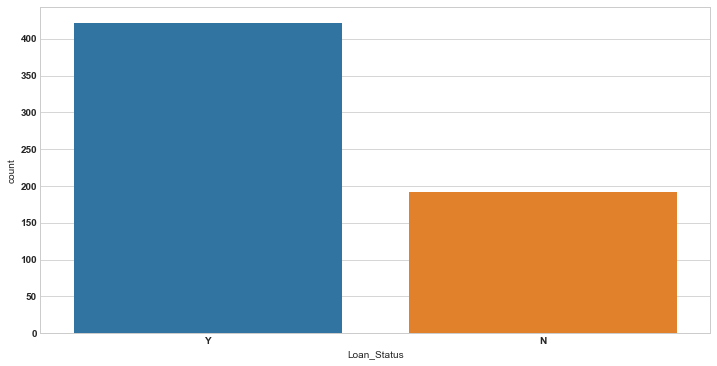

In [7]:
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams["font.weight"] = "bold"

sns.set_style('whitegrid')
sns.countplot( 'Loan_Status', data=loan)

###### Gender vs Loan_Status

In [8]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Text(0,0.5,'Loan Status')

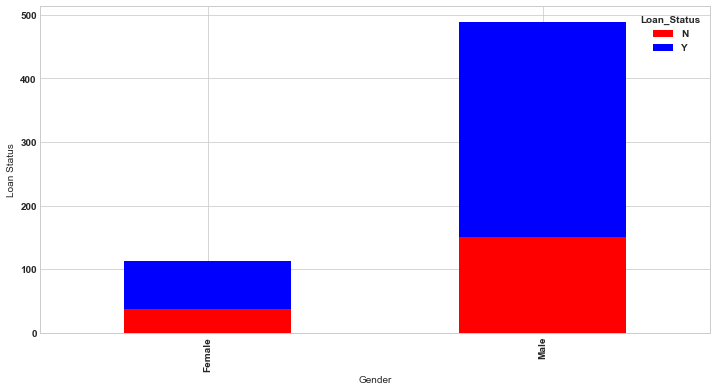

In [9]:
pd.crosstab(loan.Gender, loan.Loan_Status)\
  .plot(kind='bar', stacked=True, color=['red','blue']).set_ylabel('Loan Status')

###### Dependents vs Loan Status

In [10]:
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

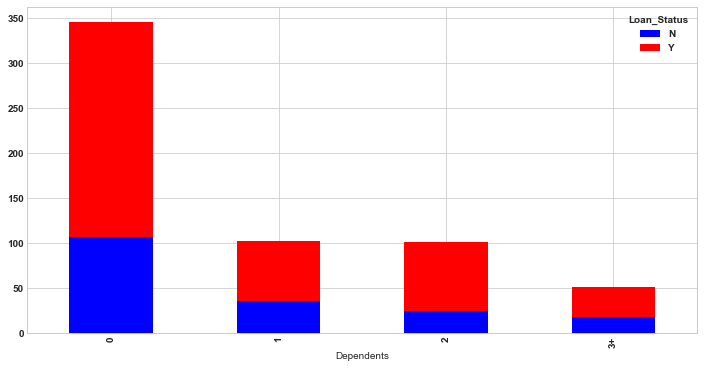

In [11]:
pd.crosstab(loan.Dependents, loan.Loan_Status)\
  .plot(kind='bar', stacked=True, color=['blue', 'red'])

###### Married vs Loan Status

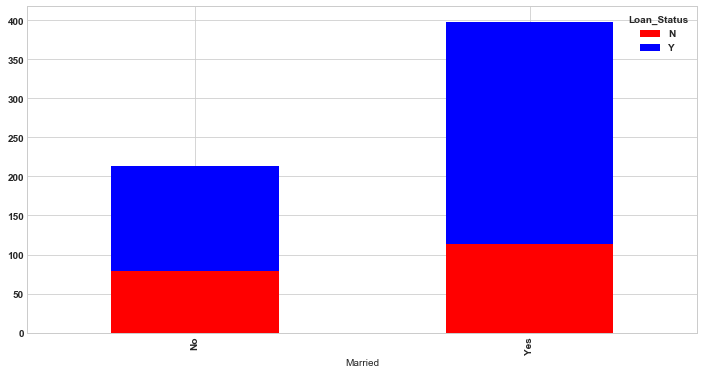

In [12]:
pd.crosstab(loan.Married, loan.Loan_Status)\
  .plot(kind='bar', stacked=True, color=['red', 'blue'])

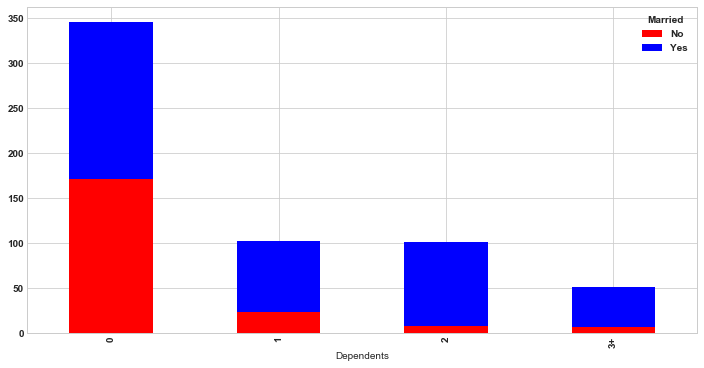

In [13]:
pd.crosstab(loan.Dependents, loan.Married)\
  .plot(kind='bar', stacked=True, color=['red', 'blue'])

##### Education vs Loan Status

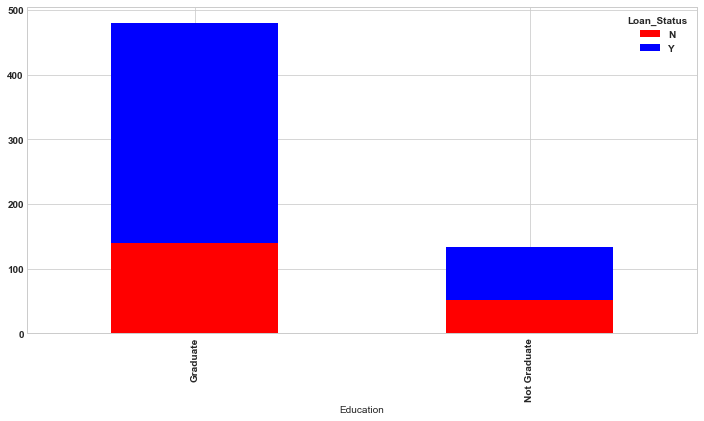

In [14]:
pd.crosstab(loan.Education, loan.Loan_Status)\
  .plot(kind='bar', stacked=True, color=['red', 'blue'])

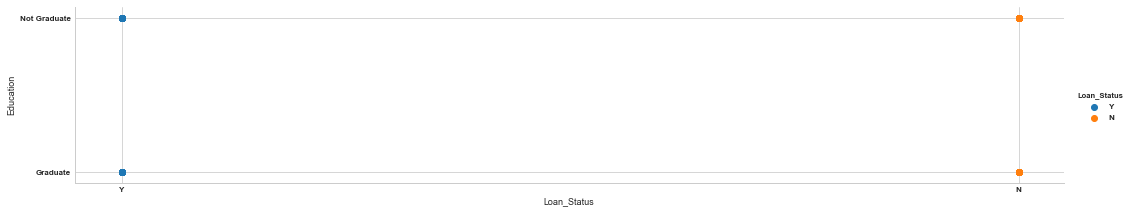

In [15]:
sns.set_context(font_scale=2, rc={'font.size':8, 'axes.labelsize':9})
sns.set_style('whitegrid')
sns.FacetGrid(loan, hue='Loan_Status', aspect=5)\
.map(plt.scatter, 'Loan_Status', 'Education')\
.add_legend()

##### Credit History vs Loan Status

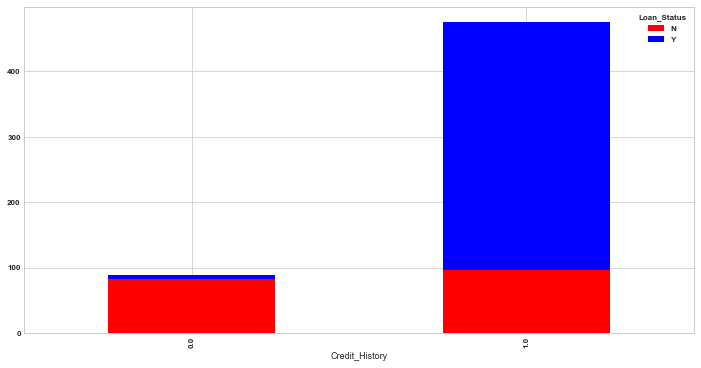

In [16]:
pd.crosstab(loan.Credit_History, loan.Loan_Status)\
  .plot(kind='bar', stacked=True, color=['red', 'blue'])

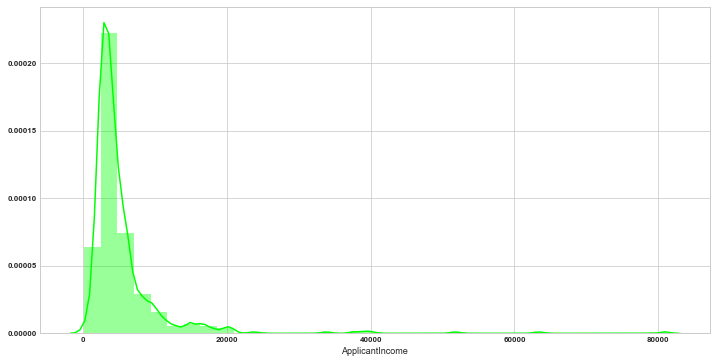

In [17]:
sns.distplot(loan['ApplicantIncome'], bins=35,color='lime')

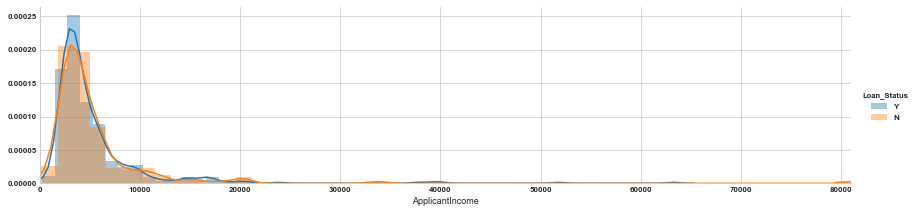

In [18]:
facet = sns.FacetGrid(data=loan, hue='Loan_Status', aspect=4)
facet.map(sns.distplot, 'ApplicantIncome')
facet.set(xlim=(0, loan['ApplicantIncome'].max()))
facet.add_legend()

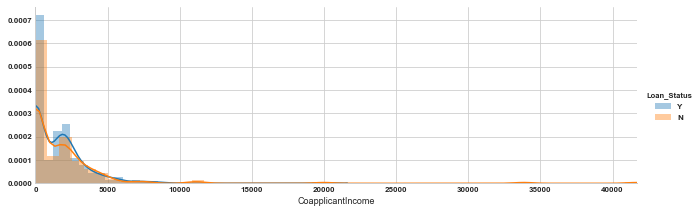

In [19]:
facet = sns.FacetGrid(data=loan, hue='Loan_Status', aspect=3)
facet.map(sns.distplot, 'CoapplicantIncome')
facet.set(xlim=(0, loan['CoapplicantIncome'].max()))
facet.add_legend()

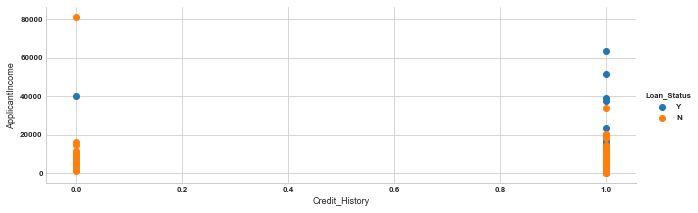

In [20]:
sns.FacetGrid(data=loan, hue='Loan_Status', aspect=3)\
   .map(plt.scatter,'Credit_History', 'ApplicantIncome',)\
   .add_legend()

#### Data Cleaning

In [21]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### Replacing Missing Values for Categorical Variables

In [22]:
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)

##### Replacing Missing Values for Numeric Variables

In [23]:
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].median(), inplace=True)

In [24]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Machine Learning Model

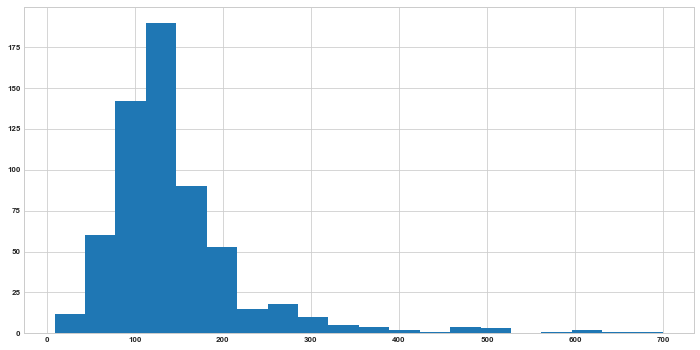

In [97]:
loan['LoanAmount'].hist(bins=20) 

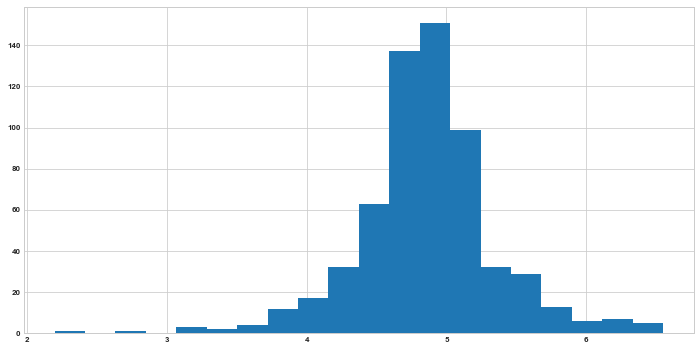

In [102]:
loan['LoanAmount'] = np.log(loan['LoanAmount']) 
loan['LoanAmount'].hist(bins=20) 

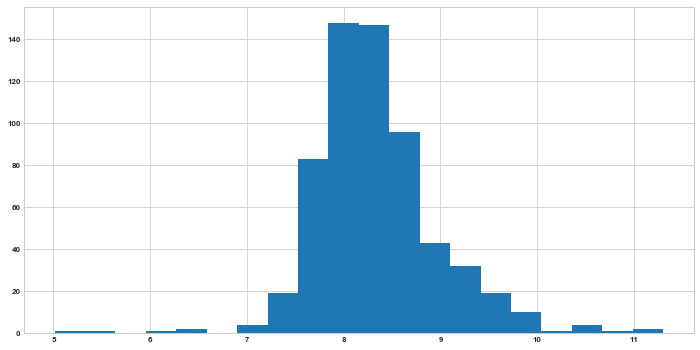

In [25]:
loan['ApplicantIncome'] = np.log(loan['ApplicantIncome']) 
loan['ApplicantIncome'].hist(bins=20) 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
X = loan.drop('Loan_Status', axis = 1)
y = loan.Loan_Status

In [28]:
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,128.0,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,141.0,360.0,1.0,Urban


In [29]:
X = X.drop('Loan_ID', axis=1)

In [30]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,8.674026,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,8.430109,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,8.006368,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,7.856707,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,8.699515,0.0,141.0,360.0,1.0,Urban


In [31]:
X = pd.get_dummies(X)

In [32]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674026,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,8.430109,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,8.006368,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,7.856707,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,8.699515,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [33]:
X.drop(['Gender_Male', 'Married_No', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_No', 'Property_Area_Semiurban'], axis = 1, inplace=True)

In [34]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Self_Employed_Yes,Property_Area_Rural,Property_Area_Urban
0,8.674026,0.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0,1
1,8.430109,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,1,0
2,8.006368,0.0,66.0,360.0,1.0,0,1,1,0,0,1,1,0,1
3,7.856707,2358.0,120.0,360.0,1.0,0,1,1,0,0,0,0,0,1
4,8.699515,0.0,141.0,360.0,1.0,0,0,1,0,0,1,0,0,1


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
log_reg = LogisticRegression()

In [59]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
pred = log_reg.predict(X_test)

In [61]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(accuracy_score(y_test, pred))

             precision    recall  f1-score   support

          N       0.94      0.46      0.62        72
          Y       0.77      0.98      0.86       131

avg / total       0.83      0.80      0.78       203



[[ 33  39]
 [  2 129]]


0.7980295566502463


In [62]:
for c in [0.01, 0.05, 0.25, 0.30, 0.45, 0.5, 1]:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    print("Accuray from C=%s: %s"
         % (c, accuracy_score(y_test, logreg.predict(X_test))))

Accuray from C=0.01: 0.645320197044335
Accuray from C=0.05: 0.7044334975369458
Accuray from C=0.25: 0.7931034482758621
Accuray from C=0.3: 0.7980295566502463
Accuray from C=0.45: 0.7980295566502463
Accuray from C=0.5: 0.7980295566502463
Accuray from C=1: 0.7980295566502463
